In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
training_set = pd.read_csv('titanic_train.csv')
training_set.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

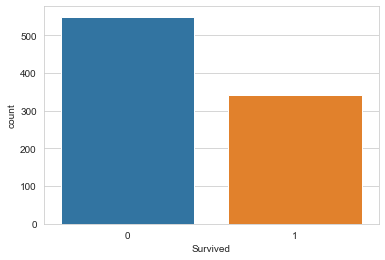

In [4]:
# checking number of survide people from data set using count plot

sns.countplot(x='Survived',data=training_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

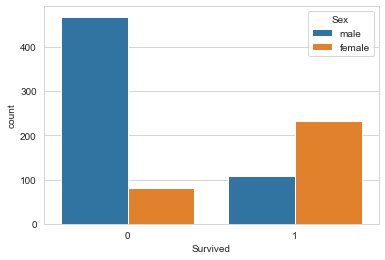

In [5]:
#lets check survival rate w.r.t sex using hue 

sns.countplot(x='Survived',data=training_set,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

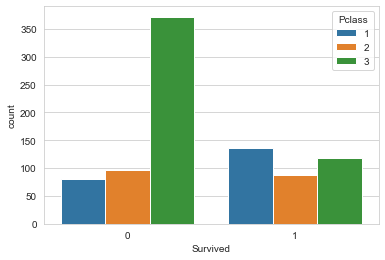

In [6]:
#lets check survival rate w.r.t Pclass using hue and palette
sns.countplot(x='Survived',data=training_set,hue='Pclass')

<AxesSubplot:ylabel='Frequency'>

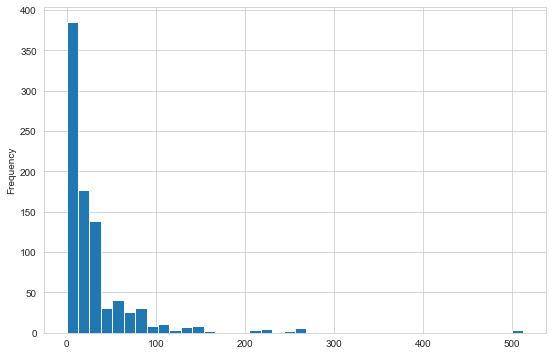

In [8]:
training_set['Fare'].plot.hist(bins=40,figsize=(9,6))

In [9]:
def adding_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else :
        return 24

In [10]:
training_set['Age'] = training_set[['Age','Pclass']].apply(adding_age,axis=1)

In [11]:
training_set.drop('Cabin',axis=1,inplace=True)

In [12]:
training_set.dropna(inplace=True)

In [13]:
sex = pd.get_dummies(training_set['Sex'],drop_first= True)

In [14]:
embark = pd.get_dummies(training_set['Embarked'],drop_first= True)

In [15]:
training_set = pd.concat([training_set,sex,embark],axis=1)

In [16]:
training_set.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace = True)

In [17]:
training_set.head()

Survived  Pclass  Age  SibSp  Parch     Fare  male  Q  S
0         0       3   24      1      0   7.2500     1  0  1
1         1       1   24      1      0  71.2833     0  0  0
2         1       3   24      0      0   7.9250     0  0  1
3         1       1   24      1      0  53.1000     0  0  1
4         0       3   24      0      0   8.0500     1  0  1

In [18]:
X = training_set.drop('Survived',axis=1)
y = training_set['Survived']

In [19]:
data_set =  pd.read_csv('titanic_test.csv')

In [20]:
data_set.drop(['Cabin'],axis=1,inplace=True)

In [21]:
def adding_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else :
        return 24

In [22]:
data_set['Age'] = data_set[['Age','Pclass']].apply(adding_age,axis=1)

In [23]:
data_set.dropna(inplace=True)

In [24]:
sex = pd.get_dummies(data_set['Sex'],drop_first= True)

In [25]:
embark = pd.get_dummies(data_set['Embarked'],drop_first= True)

In [26]:
data_set = pd.concat([data_set,sex,embark],axis=1)

In [27]:
data_set = data_set.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1)

In [28]:
X_train = training_set.drop('Survived',axis=1)
y_train = training_set['Survived']



In [29]:
X_train

Pclass  Age  SibSp  Parch     Fare  male  Q  S
0         3   24      1      0   7.2500     1  0  1
1         1   24      1      0  71.2833     0  0  0
2         3   24      0      0   7.9250     0  0  1
3         1   24      1      0  53.1000     0  0  1
4         3   24      0      0   8.0500     1  0  1
..      ...  ...    ...    ...      ...   ... .. ..
886       2   24      0      0  13.0000     1  0  1
887       1   24      0      0  30.0000     0  0  1
888       3   24      1      2  23.4500     0  0  1
889       1   24      0      0  30.0000     1  0  0
890       3   24      0      0   7.7500     1  1  0

[889 rows x 8 columns]

In [30]:
X_test = data_set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train,y_train)

c:\users\ranjit thakur\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.66      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [39]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 35,  69]], dtype=int64)

In [40]:
accuracy_score(y_test,predictions)

0.8164794007490637

# Using Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=120,criterion='entropy')

In [43]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=120)

In [44]:
pred = rfc.predict(X_test)

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       163
           1       0.79      0.67      0.73       104

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



# Using Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [48]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
pred = dtree.predict(X_test)

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       163
           1       0.81      0.66      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



# Thank You!